In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# data_dir = "/content/gdrive/My Drive/PSSP_dataset/datasetsPlusOne"
data_dir = ""

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from fastai import *
from fastai.tabular import *

In [36]:
np.random.seed(42)

In [37]:
# path = Config.data_path()/'pssp' # for google drive
path = '/Users/ghost/Desktop/PSSP_Playground'
# path = Path(base_dir + '.fastai/data/ssdd') 
# path.mkdir(parents=True, exist_ok=True) # for google drive
path

'/Users/ghost/Desktop/PSSP_Playground'

In [38]:
train_path = path + '/trainSet0PlusOne.csv' # train_path = data_dir + '/trainSet0PlusOne.csv'
test_path = path + '/testSet0PlusOne.csv' # test_path = data_dir + '/testSet0PlusOne.csv'
df_train = pd.read_csv(train_path, header=None)
df_test = pd.read_csv(test_path, header=None)

In [39]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,100,0,...,31,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,21,49,0,...,51,0,0,0,0,0,0,0,0,1
4,42,0,0,0,28,0,0,0,31,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,51,0,0,0,0,0,0,0,0,1
6,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,100,...,39,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,62,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
NEIGHBOURS = 1 # 1 amino-acid left and 1 amino-acid right added 
AMINO_ACID_LEN = 20
TOTAL_AMINO_ACIDS = (2 * NEIGHBOURS + 1) * AMINO_ACID_LEN
TOTAL_COLS = TOTAL_AMINO_ACIDS + 1 # plus the secondary structure category
TOTAL_COLS

61

In [41]:
df_train.columns = [ str(x) for x in range(0, TOTAL_COLS) ]
TRAIN_RECORDS = df_train.shape[0]
TRAIN_RECORDS

77092

In [42]:
df_test.columns = [ str(x) for x in range(0, TOTAL_COLS) ]
TEST_RECORDS = df_test.shape[0]
TEST_RECORDS

7289

In [43]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [44]:
dep_var = str(TOTAL_AMINO_ACIDS)
#cat_names = []
cont_names = [ str(x) for x in range(0, TOTAL_AMINO_ACIDS) ]
procs = [FillMissing, Categorify, Normalize]

In [45]:
test = TabularList.from_df(df_test.copy(), path=test_path, cont_names=cont_names)

In [46]:
VAL_START = TRAIN_RECORDS - TEST_RECORDS

In [47]:
data = (TabularList.from_df(df_train, path=train_path, cont_names=cont_names, procs=procs)
                             .split_by_idx(list(range(VAL_START,TRAIN_RECORDS)))
                             .label_from_df(cols=dep_var)
                             .add_test(test)
                             .databunch())

In [48]:
data.show_batch(rows=10)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/ghost/.pyenv/versions/3.7.3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-48-0ef5bf68f37d>", line 1, in <module>
    data.show_batch(rows=10)
  File "/Users/ghost/.pyenv/versions/3.7.3/lib/python3.7/site-packages/fastai/basic_data.py", line 185, in show_batch
    x,y = self.one_batch(ds_type, True, True)
  File "/Users/ghost/.pyenv/versions/3.7.3/lib/python3.7/site-packages/fastai/basic_data.py", line 168, in one_batch
    try:     x,y = next(iter(dl))
  File "/Users/ghost/.pyenv/versions/3.7.3/lib/python3.7/site-packages/fastai/basic_data.py", line 75, in __iter__
    for b in self.dl: yield self.proc_batch(b)
  File "/Users/ghost/.pyenv/versions/3.7.3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 278, in __iter__
    return _MultiProcessingDataLoaderIter(self)
  File "/Users/ghost/.pyenv/versions/3.7

OSError: [Errno 24] Too many open files

In [16]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [17]:
learn.model_dir = path

In [18]:
learn.save('pre-train')

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.806053,0.769591,0.675676,00:05
1,0.781067,0.738773,0.685416,00:05
2,0.746296,0.726062,0.695157,00:05
3,0.735325,0.719970,0.695706,00:05


In [20]:
learn.save('stage-1')

In [21]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


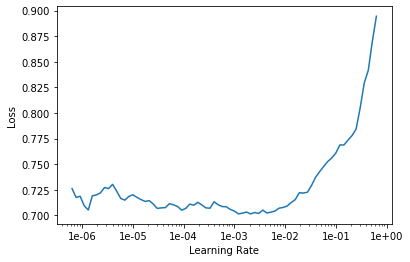

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, slice(3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.726734,0.719729,0.696255,00:05
1,0.732936,0.722242,0.695569,00:05
2,0.721322,0.716182,0.700645,00:05
3,0.727376,0.720515,0.697901,00:05


In [25]:
# learn.load('stage-1')

In [26]:
learn.save('stage-2')

In [30]:
learn.load('stage-2')

Learner(data=TabularDataBunch;

Train: LabelList (69803 items)
x: TabularList
0 -0.5394; 1 -0.5559; 2 -0.4873; 3 -0.3469; 4 -0.3680; 5 -0.1936; 6 -0.3383; 7 -0.4317; 8 -0.6192; 9 -0.3561; 10 -0.5646; 11 -0.5151; 12 -0.2005; 13 -0.3063; 14 -0.4491; 15 -0.5005; 16 -0.4577; 17 -0.5115; 18 -0.4373; 19 -0.4563; 20 -0.5396; 21 -0.5562; 22 -0.4875; 23 -0.3449; 24 -0.3679; 25 -0.1938; 26 -0.3385; 27 -0.4321; 28 6.8776; 29 -0.3556; 30 -0.5638; 31 -0.5136; 32 -0.2004; 33 -0.3063; 34 -0.4487; 35 -0.5000; 36 -0.4566; 37 -0.5115; 38 -0.4365; 39 -0.4564; 40 -0.5396; 41 -0.5557; 42 -0.4868; 43 -0.3557; 44 -0.3681; 45 -0.1937; 46 -0.3384; 47 -0.4318; 48 -0.6198; 49 7.3808; 50 -0.5649; 51 -0.5151; 52 -0.2004; 53 -0.3068; 54 -0.4489; 55 -0.5000; 56 -0.4572; 57 -0.5112; 58 -0.4364; 59 -0.4565; ,0 -0.5394; 1 -0.5559; 2 -0.4873; 3 -0.3469; 4 -0.3680; 5 -0.1936; 6 -0.3383; 7 -0.4317; 8 6.9335; 9 -0.3561; 10 -0.5646; 11 -0.5151; 12 -0.2005; 13 -0.3063; 14 -0.4491; 15 -0.5005; 16 -0.4577; 17 -0.5115; 18 -0.43

In [32]:
learn.fit_one_cycle(4, slice(3e-4))

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: DataLoader worker (pid 3614) is killed by signal: Unknown signal: 0. 

Post training check

In [33]:
row = df.iloc[0]
row

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Name: 0, Length: 61, dtype: object

In [34]:
learn.predict(row)

(Category 0,
 tensor(1),
 tensor([3.4485e-04, 8.8341e-01, 7.4285e-02, 4.1964e-02]))